# Lab 7 - Gradient Boosting

Dominik Gaweł

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/dg7s/Machine-Learning/blob/main/hw/Understanding_Binary_Cross_Entropy_in_the_Forward_Stagewise_Procedure.ipynb)
-------------------------------

# Homework Assignment: Understanding Binary Cross-Entropy in the Forward Stagewise Procedure
-----------------------------

## The Problem

In this assignment, you will demonstrate that adding a new constant predictor in the forward stagewise procedure to an already existing predictor from a previous stage, $f_{m-1}(x_i)$ (which we will denote as $f_i$ for ease of notation), may be for certain loss functions fundamentally more challenging than building a constant predictor from scratch. You will work with the binary cross-entropy loss defined as

$$
L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z)),
$$

where

- $y_i \in \{0,1\}$ are the binary labels,
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

For the purposes of this assignment, assume that you are given:

- A dataset of binary labels $y_i$.
- **Two constants: $m$ (the number of ones) and $k$ (the number of zeros)** in the labels in the dataset.
- A set of predictions $f_i = f_{m-1}(x_i)$ obtained from a previous stage, where the $f_i$ values are generated randomly from a normal distribution.

### The assignment will explore two scenarios:

### Scenario A: Fitting a Constant Predictor from Scratch

In this scenario, you are building a predictor from scratch. The task is to find the optimal constant value $\lambda$ that minimizes the binary cross-entropy loss over the dataset. Formulate the optimization problem as:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$



### Scenario B: Fitting the m-th Predictor in the Forward Stagewise Procedure

Now assume you already have an existing predictor $f_i = f_{m-1}(x_i)$. Rather than predicting from scratch, you wish to find an optimal additive correction $\lambda$ such that the updated prediction for each data point becomes

$$
 f_i + \lambda,
$$

and the corresponding binary cross-entropy loss is given by

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$


## Research Questions

In this assignment you will answer the following questions:

- Why is finding an optimal additive shift $\lambda$ in the forward stagewise procedure fundamentally harder than directly fitting a single-parameter predictor from scratch?
- How does the complexity of the loss landscape differ between these two scenarios? Discuss the differences in the shape and smoothness of the loss function in both cases.

## Tasks & Deliverables

1. **Derivation and Analysis**

  **Scenario A:**
  - Derive explicitly the optimal $\lambda$ for fitting from scratch, i.e., solve
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)
    $$
    
    and express the answer in terms of $m$ and $k$.
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Interpretation:**
  Provide a clear interpretation of your derived optimal $\lambda$. What does this constant represent in terms of the dataset's label distribution?

  **Scenario B:**
  - Derive the implicit equation that $\lambda$ must satisfy in the additive shift scenario:
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
    $$
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Discussion:**
    Explain clearly why this implicit equation has no simple closed-form solution, unlike the previous case. What role does the non-linearity of the sigmoid function (in the binary cross-entropy loss) play in this difficulty?

2. **Loss Landscape Exploration (Python)**

  Write a Python code that:

  - Uses provided values for $n$, and for $k$ and $m$ (the number of zeros and ones in the labels, respectively), $k+m=n$.
  - Generates a set of predictions $f_i$ by sampling from a normal distribution.
  - Plots the binary cross-entropy loss as a function of $\lambda$ for:
    - Scenario A:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, \lambda) \text{ as a function of }\lambda
      $$
    - Scenario B:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, f_i + \lambda) \text{ as a function of }\lambda
      $$
  - **Discussion:**
  Is the loss landscape in Scenario A simpler or more complex than in Scenario B? Is it multimodal or unimodal? If so, is it thinkable the lambda minimizer in Scenario B can be found numerically? Where does the difficulty in Scenario B come from: the non-linearity of the problem or a complex loss landscape?

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.



### Convexity Analysis

The binary cross-entropy loss is convex in the predictor variable. Consider the first and second derivatives of the loss with respect to the predictor. For a single observation $y$:

1. First Derivative:
\begin{equation}
\frac{d}{dλ} L(y,\lambda) = \left[ σ(λ) - y \right].
\end{equation}

2. Second Derivative:
\begin{equation}
\frac{\partial^2 }{\partial λ^2} L(y,\lambda) = \sigma(\lambda)(1-\sigma(\lambda)) \geq 0,
\end{equation}
since $\sigma(\lambda)\in(0,1)$. Therefore, the loss is globally convex in $\lambda$. Thus, it is sufficient to set the first derivative to zero.

---

### 1. Scenario A

The optimization problem is:
\begin{equation}
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda) = \arg\min_{\lambda} \sum_{i=1}^{n} \left[ -y_i \log(\sigma(\lambda)) - (1 - y_i) \log(1 - \sigma(λ)) \right].
\end{equation}
We derive:
\begin{equation}
\frac{d}{dλ}\sum_{i}L(y_i,\lambda) = \sum_i \left[ σ(λ) - y_i \right] = n\sigma(\lambda) - m.
\end{equation}
Setting this to zero gives:
\begin{equation}
n\sigma(\lambda^*) = m \iff \sigma(\lambda^*) = \frac{m}{n} \iff \lambda^* = \log \frac{m}{n-m} = \log \frac{m}{k} = \log \left( \frac{P(\text{positive})}{P(\text{negative})} \right),
\end{equation}
where $k = n - m$ and $n \neq m$.

**Interpretation**:


The optimal constant $\lambda^*$ represents the **log-odds** of the positive class in the dataset. Specifically
$$
\lambda^* = \log \left(\frac{m}{k}\right),
$$
which matches the empirical probability of the positive class.

---

### 2. Scenario B

The optimization problem is:
\begin{equation}
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda) = \arg\min_{\lambda} \sum_{i=1}^{n} \left[ -y_i \log(\sigma(f_i + \lambda)) - (1 - y_i) \log(1 - \sigma(f_i + λ)) \right].
\end{equation}

Analogously, we have
\begin{equation}
\frac{d}{dλ}\sum_{i}L(y_i,f_i + \lambda) = 0.
\end{equation}
This simplifies to the implicit equation:
\begin{equation}
\sum_i[\sigma(f_i+\lambda) - y_i] = 0 \iff \sum_i \sigma(f_i+\lambda) = \sum_i y_i = m.
\end{equation}

Finally,
\begin{equation}
\sum_i \sigma(f_i+\lambda^*) = m.
\end{equation}

**Disscusion**:

1. **No Closed-Form Solution**:

  Equation $\sum_i \sigma(f_i+\lambda^*) = m$ has no analytical solution due to the non-linearity of the sigmoid function. Unlike Scenario A, where all terms $\sigma(λ)$ share the same $λ$, here each $\sigma(f_i+λ)$ is shifted by a distinct $f_i$​. This asymmetry prevents isolating $λ^∗$ in closed form.

2. **Numerical Solution**:

  Despite the lack of a closed-form solution, the convexity of the loss ensures a unique global minimum. Thus, numerical methods (e.g., gradient descent, Newton's method) can efficiently solve for $λ^*$

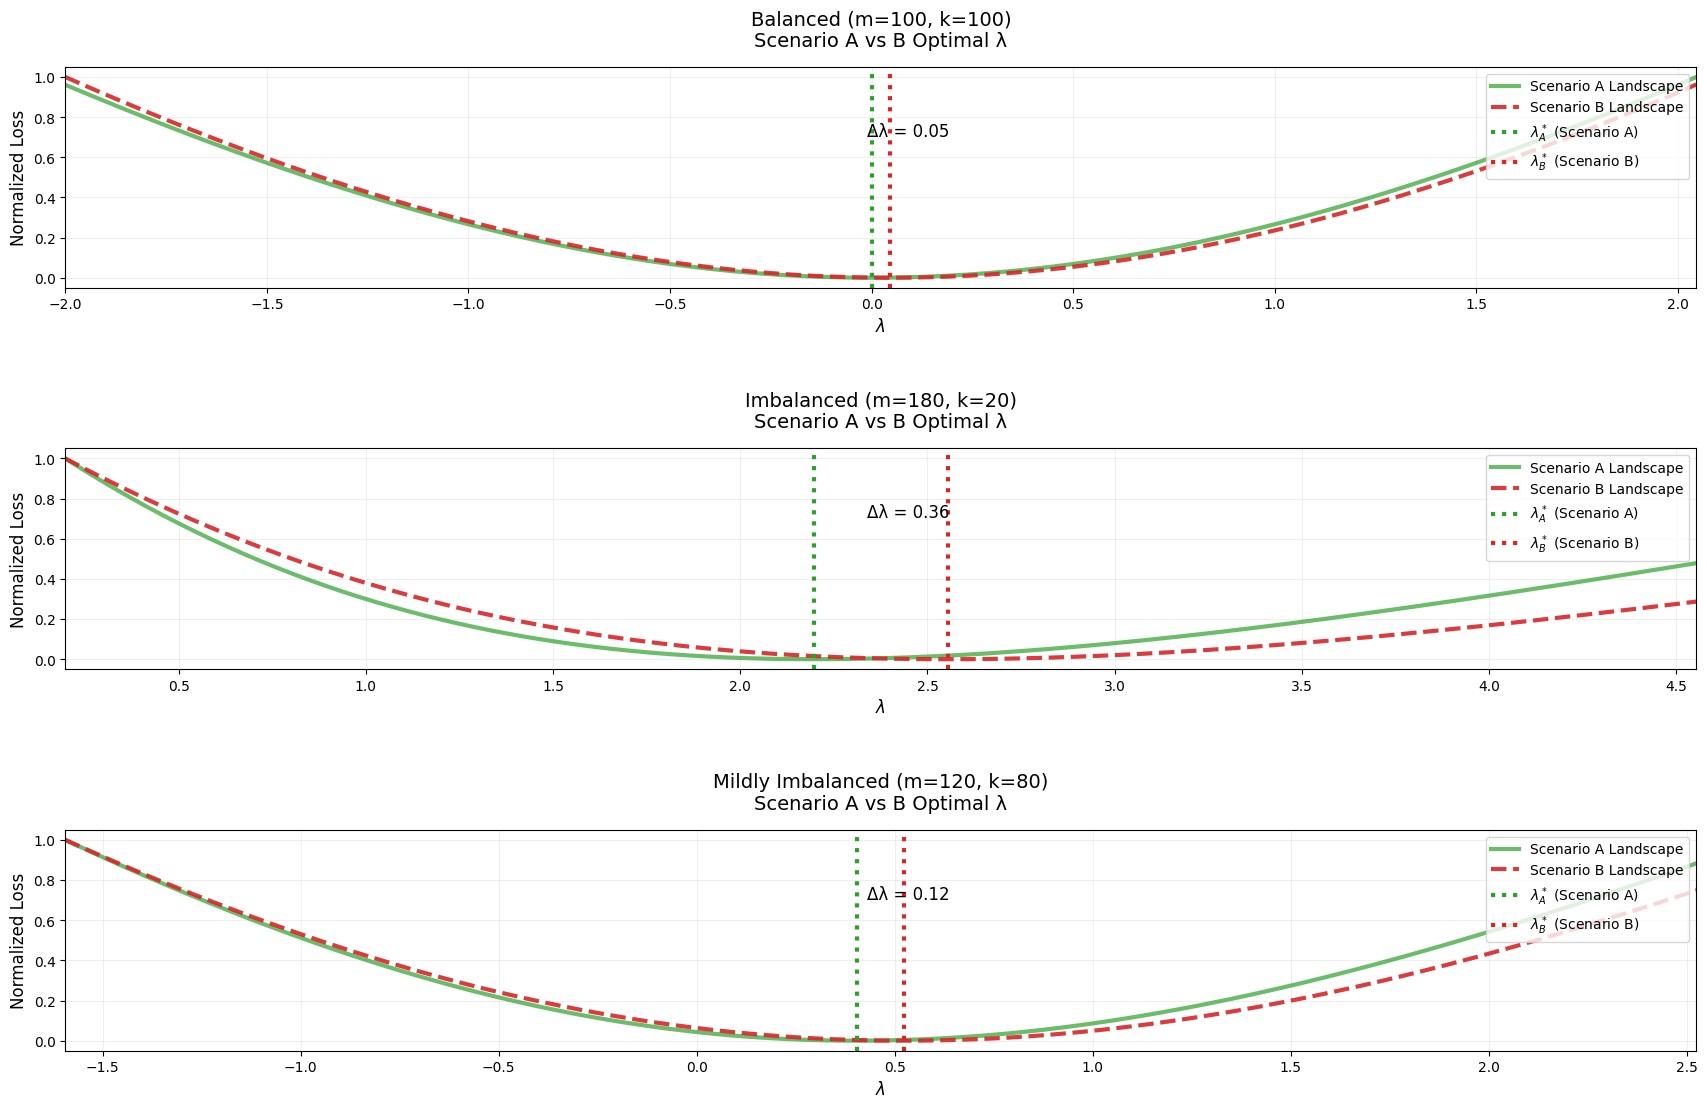

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Parameters
cases = [
    {"m": 100, "k": 100, "title": "Balanced (m=100, k=100)"},
    {"m": 180, "k": 20, "title": "Imbalanced (m=180, k=20)"},
    {"m": 120, "k": 80, "title": "Mildly Imbalanced (m=120, k=80)"}
]
np.random.seed(42)
n_total = 200
f = np.random.normal(loc=0, scale=1, size=n_total)


plt.figure(figsize=(18, 12))

for idx, case in enumerate(cases, 1):
    m, k = case["m"], case["k"]
    y = np.concatenate([np.ones(m), np.zeros(k)])

    n = m + k

    # =================================================================
    # Scenario A: Closed-form solution
    # =================================================================
    def loss_A(lam):
        sigma = 1 / (1 + np.exp(-lam))
        sigma = np.clip(sigma, 1e-10, 1 - 1e-10)
        return -np.sum(y * np.log(sigma) + (1 - y) * np.log(1 - sigma))

    lambda_A_opt = np.log(m/k)

    # =================================================================
    # Scenario B: Numerical optimization
    # =================================================================
    def loss_B(lam):
        z = f[:n] + lam  # Ensure alignment with labels
        sigma = 1 / (1 + np.exp(-z))
        sigma = np.clip(sigma, 1e-10, 1 - 1e-10)
        return -np.sum(y * np.log(sigma) + (1 - y) * np.log(1 - sigma))

    result = minimize_scalar(loss_B, method='bounded', bounds=(lambda_A_opt-5, lambda_A_opt+5))
    lambda_B_opt = result.x

    # =================================================================
    # Plotting
    # =================================================================
    ax = plt.subplot(3, 1, idx)

    lambda_min = min(lambda_A_opt, lambda_B_opt) - 2
    lambda_max = max(lambda_A_opt, lambda_B_opt) + 2
    lambda_vals = np.linspace(lambda_min, lambda_max, 500)

    L_A = [loss_A(lam) for lam in lambda_vals]
    L_B = [loss_B(lam) for lam in lambda_vals]

    # Normalize losses to [0, 1]
    L_A_norm = (L_A - np.min(L_A)) / np.ptp(L_A)
    L_B_norm = (L_B - np.min(L_B)) / np.ptp(L_B)

    plt.plot(lambda_vals, L_A_norm, label='Scenario A Landscape',
             color='#2ca02c', linewidth=3, alpha=0.7)
    plt.plot(lambda_vals, L_B_norm, label='Scenario B Landscape',
             color='#d62728', linestyle='--', linewidth=3, alpha=0.9)

    plt.axvline(lambda_A_opt, color='#2ca02c', linestyle=':',
                linewidth=3, label=r'$\lambda^*_A$ (Scenario A)')
    plt.axvline(lambda_B_opt, color='#d62728', linestyle=':',
                linewidth=3, label=r'$\lambda^*_B$ (Scenario B)')

    diff = lambda_B_opt - lambda_A_opt
    plt.annotate(f'Δλ = {diff:.2f}',
                 xy=((lambda_A_opt + lambda_B_opt)/2, 0.5),
                 xytext=(20, 30), textcoords='offset points',
                 fontsize=12, ha='center')

    plt.title(f"{case['title']}\nScenario A vs B Optimal λ", fontsize=14, pad=15)
    plt.xlabel(r'$\lambda$', fontsize=12)
    plt.ylabel('Normalized Loss', fontsize=12)
    plt.grid(True, alpha=0.2)
    plt.legend(fontsize=10, loc='upper right')
    plt.xlim(lambda_min, lambda_max)

plt.tight_layout(pad=4.0)
plt.show()

### Final Discussion

**Convexity & Modality**  
- Both scenarios yield **unimodal** (convex) losses.

**Scenario A**  
- All terms share the same $\lambda$ $\implies$ convex “bowl” centered at $λ^*=\log(m/k)$.  
- **Closed‑form**: $\lambda^*=\log\frac{m}{k}.$

**Scenario B**  
- Terms are $\sigma(f_i+\lambda)$ with distinct shifts $f_i$.  
- Loss is smooth, convex ($\implies$ unique minimizer) but **asymmetric**.
- **No analytic solution** for  
  $$
    \sum_i\sigma(f_i+\lambda)=m.
  $$
  It can be solved numerically.

**Core difficulty**  
- Sigmoid nonlinearity + heterogeneous shifts $f_i$ destroys the log‑odds symmetry, requiring numeric root‑finding despite unimodality.
